# Tutorial

In [ ]:
% python3 -m pip install git+https://github.com/treforevans/uci_datasets.git

In [1]:
import wadiroscnn as ws
from uci_datasets import Dataset
import torch
import matplotlib.pyplot as plt

## Define a model and load dataset

In [2]:
data = Dataset("energy")
x_train, y_train, x_test, y_test = data.get_split(split=0)


model = ws.wadiro_scnn()

energy dataset, N=768, d=8


## Train

In [3]:
model.train(x_train, y_train, radius=0.01, bias=True, max_neurons=600, verbose=False, wasserstein="l2")


0.556135897671052

## Get torch model and predict

In [4]:
model_torch = model.get_torch_model(verbose=False)

y_preds_torch = model_torch(torch.tensor(x_test)) # prediction with the torch model formed with the non-convex weights
y_preds = model.predict_with_sampled_u(x_test, verbose=False) # prediction with the optimal convex weights 

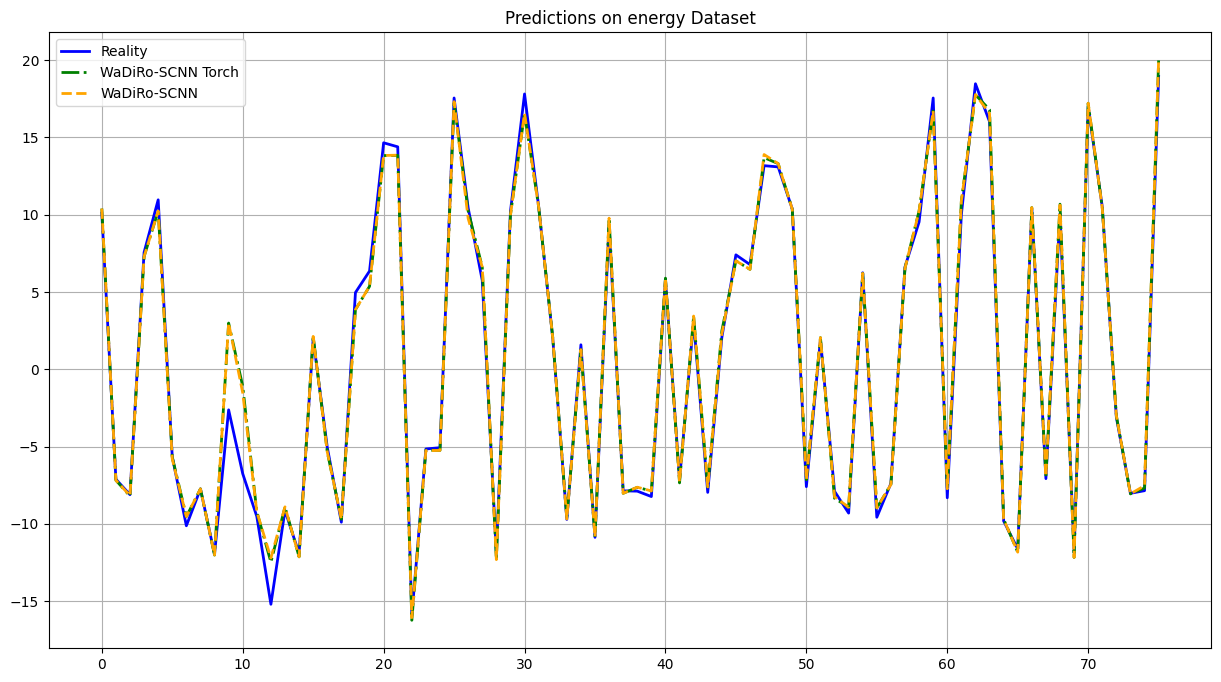

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label="Reality", color="blue", linewidth=2)
plt.plot(y_preds_torch.detach().numpy(), color="green", linestyle="dashdot", label="WaDiRo-SCNN Torch", linewidth=2)
plt.plot(y_preds.flatten(), linestyle="dashed", color="orange", label="WaDiRo-SCNN", linewidth=2)
plt.legend()
plt.title("Predictions on energy Dataset")
plt.grid()
plt.show()